# 10-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

## 라이브러리 버전을 확인해 봅니다

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


## 데이터를 준비하자

#### 데이터 불러오기 + Resize 하기

In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

103  images to be resized.
103  images resized.
가위 이미지 resize 완료!


In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
바위 이미지 resize 완료!


In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

102  images to be resized.
102  images resized.
보 이미지 resize 완료!


가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링

In [6]:
import numpy as np

def load_data(img_path, number_of_data=306):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 306 입니다.
x_train shape: (306, 28, 28, 3)
y_train shape: (306,)


촬영된 데이터 파일수를 고려하여 number_of_data = 306으로 지정하였다.

라벨:  0


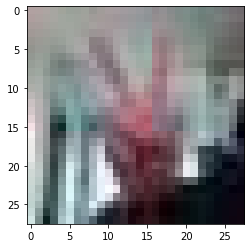

In [7]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

라벨:  1


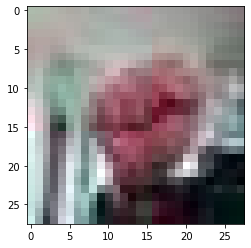

In [8]:
plt.imshow(x_train[150])
print('라벨: ', y_train[150])

라벨:  2


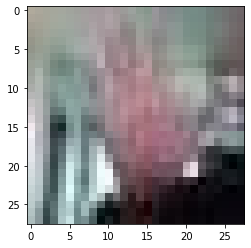

In [9]:
plt.imshow(x_train[300])
print('라벨: ', y_train[300])

라벨:  0


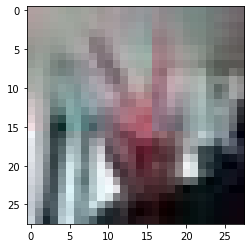

In [10]:
plt.imshow(x_train[99])
print('라벨: ', y_train[99])

In [11]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


## 딥러닝 네트워크 설계하기

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# 입력층 : RGB 3개의 색상층이 존재하므로 28 * 28 * 3 출력층 : 최종 분류기의 class 수 : 가위바위보 0, 1, 2 - 3개
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

 입력층 : RGB 3개의 색상층이 존재하므로 28 * 28 * 3 출력층 : 최종 분류기의 class 수 : 가위바위보 0, 1, 2 - 3개

## 딥러닝 네트워크 학습시키기

데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

In [13]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 3s 11ms/step - loss: 1.0535 - accuracy: 0.4641
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9025 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1950 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000


정확도가 1이 나온걸 보니 과대적합 문제가 발생한 것을 확인할 수 있었다.
문제의 원인은 사진을 촬영할 당시에 손모양의 변화의 정도가 너무 적어서 비슷한 사진이 너무많아서 이렇게되지 않았나 싶다..

## 얼마나 잘 만들었는지 확인하기(테스트)

옆 친구의 이미지 데이터 300장을 받아오세요. (상준님걸로 테스트)

In [14]:
test_scissor_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(test_scissor_image_dir_path)   # 테스트 가위 이미지 resize

test_rock_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(test_rock_image_dir_path)   # 테스트 바위 이미지 resize

test_paper_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(test_paper_image_dir_path)   # 테스트 보 이미지 resize

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [15]:
# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
# (x_test, y_test)=load_data(image_dir_path)

# print(f"x_test shape: {x_test.shape}")
# print(f"y_test shape: {y_test.shape}")


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (306, 28, 28, 3)
y_test shape: (306,)


In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 609.7342 - accuracy: 0.3399
test_loss : 609.7341918945312
test_accuracy : 0.33986929059028625


첫번째 test_accuracy : 0.33006536960601807 값으로 보아 정확도가 많이 떨어지는 것을 확인할 수 있었다.

정확도가 떨어지는 이유에 대하여 

1. 이미지의 픽셀 개수로 리사이즈 시킨 것(해상도가 너무 떨어져 형태를 식별하기가 어렵다)

2. 실내에서 웹캠으로 촬영을 하였기 때문에 어쩔수 없이 촬영한 사람마다 이미지 데이터가 비슷해(배경색 전경색 등등) 다른사람의 데이터로 테스트를 할 경우 높은 정확도를 기대하기 어렵다.

3. 데이터의 양이 충분한지에 대한 여부, 한정된 데이터의 양으로 학습을 할 경우 과적합 문제가 발생할 수 있다. (내 이미지 데이터의 특성상 이미지의 형태나 포즈가 변동성이 적다)

와 같은 원인을 분석하였다.

위 문제에 대한 해결방안으로,

1. 이미지 픽셀수를 크게 시도해볼 것.
2. 다른사람들의 손 파일도 섞어서 이미지 데이터의 랜덤화 정도를 늘려볼 것.
3. 데이터양이 충분하지 않다고 판단되어 검증방법으로는 k-fold 검증이나 데이터 증식의 방법을 시도해본다.
4. 하이퍼 파라미터 튜닝을 시도해보기

의 결론을 도출하였다.

## 더 좋은 네트워크 만들어보기(2번째)

이미지 해상도 높여서 시도해보기

In [17]:
def resize_images_56(img_path):
    
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 56x56 사이즈로 바꾸어 저장
    target_size=(56,56)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")


In [18]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2/scissor"
resize_images_56(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2/rock"
resize_images_56(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2/paper"
resize_images_56(image_dir_path)
print("보 이미지 resize 완료!")

103  images to be resized.
103  images resized.
가위 이미지 resize 완료!
101  images to be resized.
101  images resized.
바위 이미지 resize 완료!
102  images to be resized.
102  images resized.
보 이미지 resize 완료!


In [19]:
import numpy as np

def load_data(img_path, number_of_data=306):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels



In [20]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 306 입니다.
x_train shape: (306, 56, 56, 3)
y_train shape: (306,)


라벨:  0


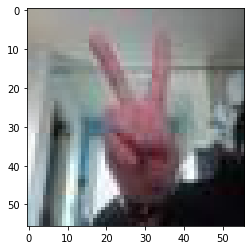

In [21]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# 입력층 : RGB 3개의 색상층이 존재하므로 28 * 28 * 3 출력층 : 최종 분류기의 class 수 : 가위바위보 0, 1, 2 - 3개
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(56,56,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 54, 54, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                589888    
_________________________________________________________________
dense_3 (Dense)              (

In [23]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 13ms/step - loss: 1.0906 - accuracy: 0.4902
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.9120 - accuracy: 0.5654
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5572 - accuracy: 0.9641
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 3.9707e-04 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 2.4055e-04 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 1.8791e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 1.6591e-04 - accuracy: 1.0000


In [24]:
test_scissor_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2/test/scissor"
resize_images_56(test_scissor_image_dir_path)   # 테스트 가위 이미지 resize

test_rock_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2/test/rock"
resize_images_56(test_rock_image_dir_path)   # 테스트 바위 이미지 resize

test_paper_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2/test/paper"
resize_images_56(test_paper_image_dir_path)   # 테스트 보 이미지 resize

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


라벨:  0


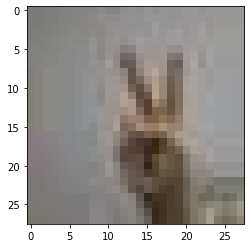

In [25]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

이미지 해상도가 좋아졌다. 이부분을 진행하면서 원본데이터가 28 x 28로 리사이즈되어 디렉토리를 다시 지정해줘야함을 깨달았다.

In [26]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (306, 56, 56, 3)
y_test shape: (306,)


In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 744.9402 - accuracy: 0.3693
test_loss : 744.940185546875
test_accuracy : 0.3692810535430908


다른 것들은그대로, 해상도만 56으로 바꾼 경우 정확도가 소폭 상승하였다. test_accuracy : 0.38562092185020447

이미지 사이즈 112도 해봐야겠다....

## 더 좋은 네트워크 만들어보기(3번째)

이미지 해상도 112로 시도하기

In [28]:
def resize_images_112(img_path):
    
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 112x112 사이즈로 바꾸어 저장
    target_size=(112,112)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")


In [29]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/scissor"
resize_images_112(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/rock"
resize_images_112(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/paper"
resize_images_112(image_dir_path)
print("보 이미지 resize 완료!")

103  images to be resized.
103  images resized.
가위 이미지 resize 완료!
101  images to be resized.
101  images resized.
바위 이미지 resize 완료!
102  images to be resized.
102  images resized.
보 이미지 resize 완료!


In [30]:
import numpy as np

def load_data(img_path, number_of_data=306):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels



In [31]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_train)의 이미지 개수는 306 입니다.


In [32]:
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (306, 112, 112, 3)
y_train shape: (306,)


라벨:  0


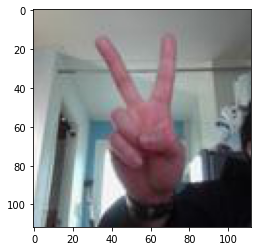

In [33]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

이미지 해상도가 훨씬 좋아졌다.

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# 입력층 : RGB 3개의 색상층이 존재하므로 28 * 28 * 3 출력층 : 최종 분류기의 class 수 : 가위바위보 0, 1, 2 - 3개
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 110, 110, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2768960   
_________________________________________________________________
dense_5 (Dense)              (

In [35]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 24ms/step - loss: 1.2998 - accuracy: 0.3824
Epoch 2/10
10/10 [==============================] - 0s 10ms/step - loss: 1.0469 - accuracy: 0.5882
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 0.6448 - accuracy: 0.9118
Epoch 4/10
10/10 [==============================] - 0s 10ms/step - loss: 0.0999 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 10ms/step - loss: 2.8235e-04 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 8.4605e-05 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 10ms/step - loss: 5.1178e-05 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 10ms/step - loss: 3.9488e-05 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 10ms/step - loss: 3.4156e-05 - accura

In [36]:
test_scissor_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/test/scissor"
resize_images_112(test_scissor_image_dir_path)   # 테스트 가위 이미지 resize

test_rock_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/test/rock"
resize_images_112(test_rock_image_dir_path)   # 테스트 바위 이미지 resize

test_paper_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/test/paper"
resize_images_112(test_paper_image_dir_path)   # 테스트 보 이미지 resize

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [37]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper3/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (306, 112, 112, 3)
y_test shape: (306,)


라벨:  0


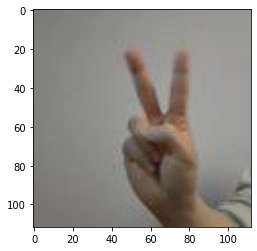

In [38]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [39]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 372.9180 - accuracy: 0.3889
test_loss : 372.91802978515625
test_accuracy : 0.3888888955116272


이미지 해상도를 28에서 112로 점진적으로 바꾸어 보았으나 정확도가 드라마틱하게 상승하지는 않았다...

촬영당시에 너무 동작변화가 없어서 내 모델이 가위바위보 분류기로 적합하지 않게 학습되었을 가능성이 있기에..\
재촬영하고 싹 다 갈아엎어서 다시 진행해봐야겠다....

이미지 사이즈를 업로드할 때는 모델이 같이 바뀌어주어야 한다는 것을 수경님이 알려주셨다. 
역시 대단한 분이다...

## 더 좋은 네트워크 만들어보기(4번째)

이미지의 해상도는 112로 유지하고 학습 데이터셋을 500개로 늘리고, 데이터 split을 활용한다


In [40]:
def resize_images_112_2(img_path):
    
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 112x112 사이즈로 바꾸어 저장
    target_size=(112,112)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")


In [41]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper5/scissorf"
resize_images_112_2(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper5/rockf"
resize_images_112_2(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper5/paperf"
resize_images_112_2(image_dir_path)
print("보 이미지 resize 완료!")

500  images to be resized.
500  images resized.
가위 이미지 resize 완료!
500  images to be resized.
500  images resized.
바위 이미지 resize 완료!
500  images to be resized.
500  images resized.
보 이미지 resize 완료!


In [44]:
import numpy as np

def load_data(img_path, number_of_data=1500):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissorf/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rockf/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paperf/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels



In [45]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper5"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_train)의 이미지 개수는 1500 입니다.


In [46]:
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (1500, 112, 112, 3)
y_train shape: (1500,)


라벨:  0


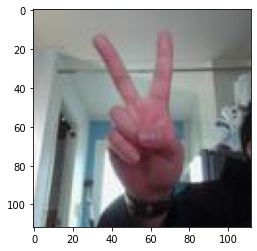

In [47]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [49]:
def train_val_test_split(ds, ds_size, sd,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # trainning set, validation set, test set 을 동일하게 섞기 위해 seed 를 설정
        ds_shuffled = np.random.RandomState(seed=sd).permutation(ds)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds_shuffled[0:train_size]    
    val_ds = ds_shuffled[train_size:train_size+val_size]
    test_ds = ds_shuffled[train_size+val_size:]
    
    return train_ds, val_ds, test_ds

x_train_new, x_val_new, x_test_new = train_val_test_split(x_train,1500,50)
y_train_new, y_val_new, y_test_new = train_val_test_split(y_train,1500,50)

앞의 시도와는 다르게 다른 사람의 데이터를 테스트셋으로 사용하는 것이 아니므로 데이터를 검증데이터와 테스트 데이터로 나누어준다.
4명의 데이터를 섞은 데이터 셋이므로 각 사람마다 유사정도가 비슷할 것이라고 판단되는데 랜덤화 정도를 많이 섞어야한다는 생각이 들었다.
셔플이라는 기능을 통해 데이터들을 섞어줄 수 있도록 하였다.

In [50]:
print(x_train_new.shape)
print(x_val_new.shape)
print(x_test_new.shape)

print(y_train_new.shape)
print(y_val_new.shape)
print(y_test_new.shape)

(1200, 112, 112, 3)
(150, 112, 112, 3)
(150, 112, 112, 3)
(1200,)
(150,)
(150,)


데이터가 잘 나뉘어진 모습을 확인할 수 있었다.

라벨:  0


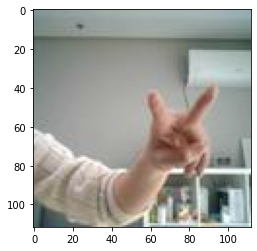

In [51]:
plt.imshow(x_train_new[0])
print('라벨: ', y_train_new[0])

라벨:  0


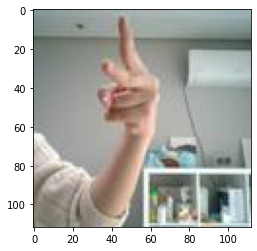

In [53]:
plt.imshow(x_train_new[200])
print('라벨: ', y_train_new[200])

라벨:  1


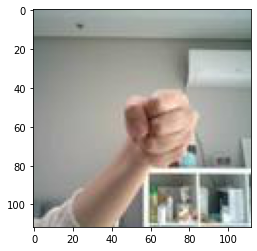

In [54]:
plt.imshow(x_train_new[400])
print('라벨: ', y_train_new[400])

이미지의 해상도가 112로 꽤나 선명하다.

In [55]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 110, 110, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2768960   
_________________________________________________________________
dense_7 (Dense)              (

In [58]:
x_train_new_norm = x_train_new / 255.0

In [59]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_new_norm, y_train_new, epochs=10)

Epoch 1/10
38/38 [==============================] - 1s 16ms/step - loss: 0.0648 - accuracy: 0.9825
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0120 - accuracy: 0.9983
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 11ms/step - loss: 7.4394e-04 - accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 4.6345e-04 - accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 2.8741e-04 - accuracy: 1.0000
Epoch 8/10
38/38 [==============================] - 0s 10ms/step - loss: 2.2743e-04 - accuracy: 1.0000
Epoch 9/10
38/38 [==============================] - 0s 11ms/step - loss: 2.0542e-04 - accuracy: 1.0000
Epoch 10/10
38/38 [==============================] - 0s 11ms/step - loss: 1.7771e-04 - ac

In [60]:
test_loss, test_accuracy = model.evaluate(x_val_new, y_val_new, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

5/5 - 0s - loss: 33.9036 - accuracy: 0.9667
test_loss : 33.903602600097656
test_accuracy : 0.9666666388511658


검증데이터와의 정확도가 96%가 나왔다.

In [61]:
test_loss, test_accuracy = model.evaluate(x_test_new, y_test_new, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

5/5 - 0s - loss: 14.0323 - accuracy: 0.9867
test_loss : 14.032318115234375
test_accuracy : 0.9866666793823242


테스트데이터와의 정확도가 98%가 나왔다.;;;;;;